# ProduceFalseColourGeotiffs

**What does this notebook do?** This notebooks demonstrates how you can call an external set of python functions into a Jupyter Notebook, rather than loading them all explicitly within the notebook cells. This streamlines the notebook, and makes it a lot easier to read the code. This notebook uses two python files: `DEAPlotting` and `DEADataHandling`, both of which are also available to download. The notebook develops a query and extracts some data using the `DEADataHandling.load_nbart` function. It then plots up a false colour image and saves it as a Geotiff using the `DEAPlotting` functions.


**Date** March 2018

**Author** Claire Krause

**Tags** 

# This is the bit that allows you to call in a stand alone python file. 

The two python files `DEAPlotting.py` and `DEADataHandling.py` are both sitting in the `algorithms` folder.

In [1]:
% pylab notebook

import sys
import os
sys.path.append(os.path.abspath('/g/data/r78/cek156/dea-notebooks/algorithms'))
import DEAPlotting
import DEADataHandling

# Now just some regular module imports
from datacube import Datacube
from datetime import datetime

dc = Datacube(app = 'test')

Populating the interactive namespace from numpy and matplotlib


# Extract some data using our imported function

In [2]:
query = {
        'lat': (-11.85, -11.98),
        'lon': (133.79, 133.93),
        'time':('2016-07-25', '2016-08-10')
        }

In [3]:
data, crs, affine = DEADataHandling.load_nbarx('ls8', query, ['swir1','nir','green'], product = 'nbar')

loading ls8_nbart_albers
loaded ls8_nbart_albers
making mask ls8_pq_albers
masked ls8_nbart_albers with ls8_pq_albers and filtered terrain


In [4]:
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 631, y: 573)
Coordinates:
  * time     (time) datetime64[ns] 2016-08-03T01:10:27
  * y        (y) float64 -1.249e+06 -1.249e+06 -1.249e+06 -1.249e+06 ...
  * x        (x) float64 1.988e+05 1.988e+05 1.989e+05 1.989e+05 1.989e+05 ...
Data variables:
    swir1    (time, y, x) float64 1.657e+03 1.608e+03 1.535e+03 2.02e+03 ...
    nir      (time, y, x) float64 2.251e+03 2.43e+03 2.565e+03 2.253e+03 ...
    green    (time, y, x) float64 666.0 710.0 736.0 1.107e+03 1.487e+03 ...
Attributes:
    crs:      EPSG:3577
    affine:   | 25.00, 0.00, 198800.00|\n| 0.00,-25.00,-1249400.00|\n| 0.00, ...

# Draw a false colour image using our imported function

<IPython.core.display.Javascript object>


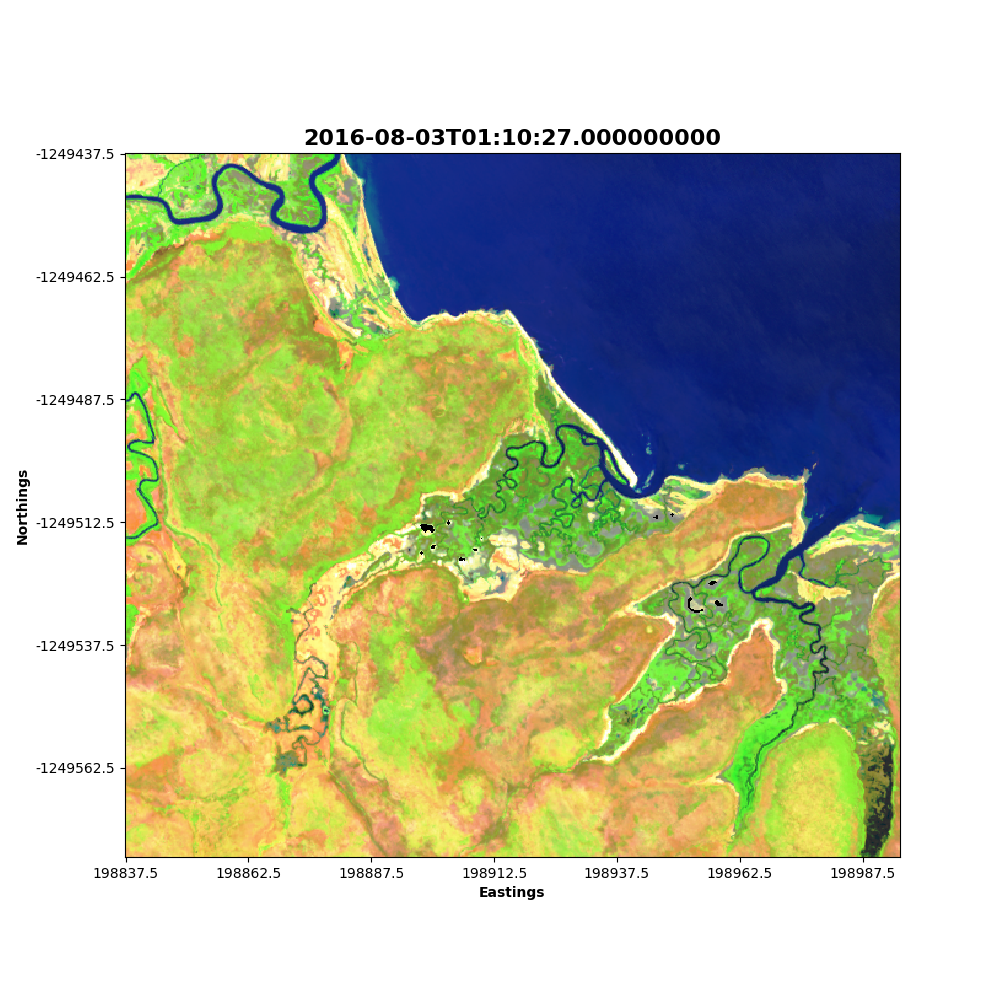

In [5]:
DEAPlotting.three_band_image(data, ['swir1','nir','green'])

# Export the three bands to Geotiff using our imported function

In [6]:
DEAPlotting.write_to_geotiff('JunctionBay_2016-08-03.tif', data.squeeze())